# 1. Import Library

In [48]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 數據準備

In [49]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [50]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [51]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [52]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [53]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [55]:
model = Sequential()

In [56]:
#卷積層1與池化層1

In [57]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [58]:
model.add(Dropout(rate=0.25))

In [59]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [60]:
#卷積層2與池化層2

In [61]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [62]:
model.add(Dropout(0.25))

In [63]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [64]:
#Step3	建立神經網絡(平坦層、隱藏層、輸出層)

In [65]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [66]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [67]:
model.add(Dense(10, activation='softmax'))

In [68]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

# 训练模型

In [69]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [70]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Epoch 1/10
313/313 [==============================] - 164s 520ms/step - loss: 1.5490 - accuracy: 0.4429 - val_loss: 1.3076 - val_accuracy: 0.5750
Epoch 2/10
313/313 [==============================] - 159s 509ms/step - loss: 1.1788 - accuracy: 0.5803 - val_loss: 1.1475 - val_accuracy: 0.6355
Epoch 3/10
313/313 [==============================] - 154s 491ms/step - loss: 1.0321 - accuracy: 0.6369 - val_loss: 1.0487 - val_accuracy: 0.6699
Epoch 4/10
313/313 [==============================] - 158s 504ms/step - loss: 0.9182 - accuracy: 0.6761 - val_loss: 0.9893 - val_accuracy: 0.6802
Epoch 5/10
313/313 [==============================] - 154s 491ms/step - loss: 0.8322 - accuracy: 0.7074 - val_loss: 0.9187 - val_accuracy: 0.6958
Epoch 6/10
313/313 [==============================] - 155s 495ms/step - loss: 0.7444 - accuracy: 0.7383 - val_loss: 0.8790 - val_accuracy: 0.7141
Epoch 7/10
313/313 [==============================] - 158s 504ms/step - loss: 0.6687 - accuracy: 0.7632 - val_loss: 0.8460 -

In [71]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

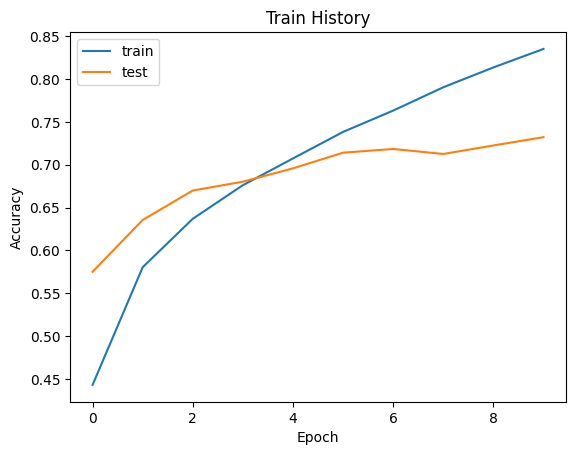

In [72]:
show_train_history('accuracy','val_accuracy')

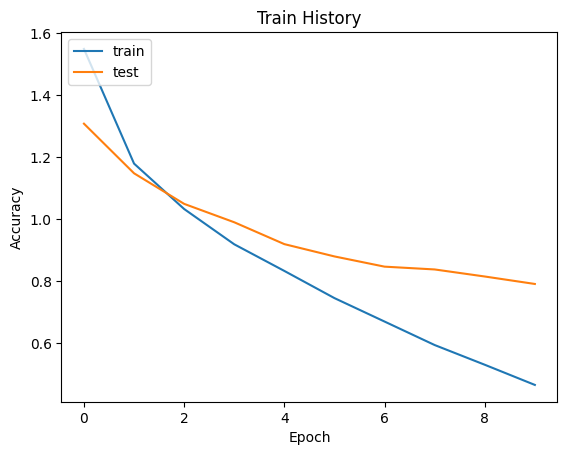

In [73]:
show_train_history('loss','val_loss')

# 評估模型的準確率

In [74]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.7282999753952026

# 進行預測

In [77]:
prediction=np.argmax(model.predict(x_img_test_normalize),axis=1)

313/313 [==============================] - 9s 28ms/step


In [78]:
prediction[:10]

array([3, 8, 8, 0, 4, 6, 1, 2, 3, 1])

# 查看預測結果

In [79]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [80]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

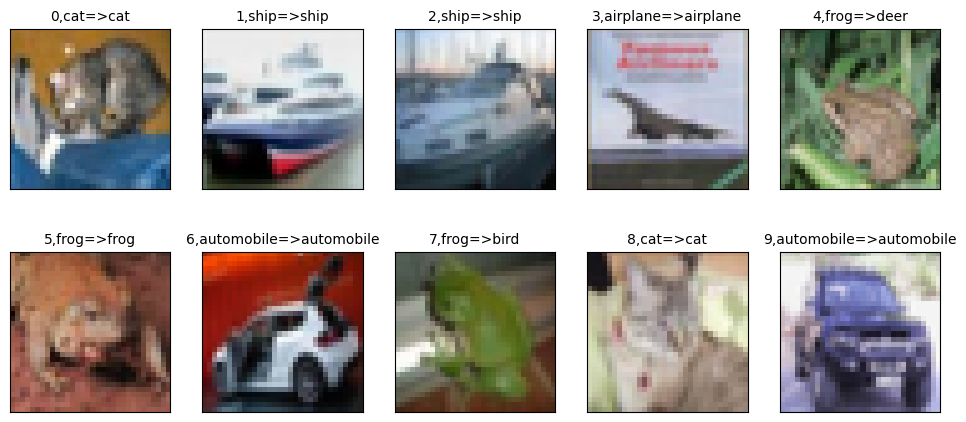

In [81]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

# 查看預測概率

In [82]:
Predicted_Probability=model.predict(x_img_test_normalize)

313/313 [==============================] - 10s 30ms/step


In [83]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


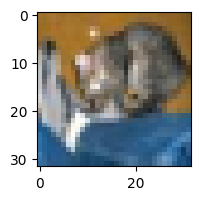

airplane Probability:0.005430983
automobile Probability:0.004479621
bird Probability:0.004707375
cat Probability:0.480446547
deer Probability:0.010595050
dog Probability:0.468867868
frog Probability:0.000246740
horse Probability:0.007124062
ship Probability:0.015452297
truck Probability:0.002649457


In [84]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

label: airplane predict: airplane


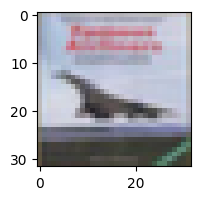

airplane Probability:0.608402193
automobile Probability:0.132278785
bird Probability:0.013834880
cat Probability:0.004078778
deer Probability:0.011420961
dog Probability:0.000117215
frog Probability:0.000894620
horse Probability:0.001836196
ship Probability:0.224025264
truck Probability:0.003111220


In [85]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

# confusion matrix

In [86]:
prediction.shape

(10000,)

In [87]:
y_label_test.shape

(10000, 1)

In [88]:
y_label_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [89]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [90]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,761,20,31,16,14,11,10,4,91,42
1,12,840,3,11,6,8,6,2,32,80
2,75,4,566,73,100,75,60,18,19,10
3,24,9,48,523,69,231,53,15,20,8
4,22,3,50,66,726,49,42,23,16,3
5,12,3,22,145,54,713,18,16,9,8
6,2,6,27,72,40,31,808,2,9,3
7,19,4,21,42,88,103,9,696,5,13
8,40,43,7,16,7,10,3,2,851,21


In [91]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
